 # SVM with Scikit-learn Experiment



 This notebook demonstrates the use of the Support Vector Machine (SVM) algorithm using the scikit-learn wrapper.



 We will load the processed breast cancer dataset, train the SVM model using the SVC method, and evaluate its performance.

In [1]:
import os
import sys

import numpy as np

# Set project root directory and add it to the system path
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(project_root)


from src.scratch.utils.metrics import (
    accuracy,
    compute_roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
)
from src.scratch.utils.viz_utils import (
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_roc_curve,
)
from src.sklearn_impl.svm_sk import SVM_SK

# Load the processed data
X_train = np.load("../../../data/processed/breast_cancer_X_train.npy")
y_train = np.load("../../../data/processed/breast_cancer_y_train_svm.npy")
X_test = np.load("../../../data/processed/breast_cancer_X_test.npy")
y_test = np.load("../../../data/processed/breast_cancer_y_test_svm.npy")

 ## Data Exploration



 The dataset contains features for breast cancer classification, with labels adjusted to -1 and 1 for SVM compatibility.

In [2]:
# Print data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (456, 30)
Training labels shape: (456,)
Test data shape: (113, 30)
Test labels shape: (113,)


 ## Model Training



 We initialize the SVM_SK model with the 'svc' method for one-shot training.

In [3]:
# Initialize the SVM_SK model
model = SVM_SK(method="svc", C=1.0, tol=1e-3, verbose=True, interval=1)

# Train the model
model.fit(X_train, y_train)

SVM_SK(interval=1, verbose=True)

 ## Model Evaluation



 We predict on the test set and compute evaluation metrics.

In [4]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = compute_roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9823
Precision: 1.0000
Recall: 0.9535
F1 Score: 0.9762
ROC AUC: 0.9767


 ## Visualization



 We plot the confusion matrix to visualize the model's performance.

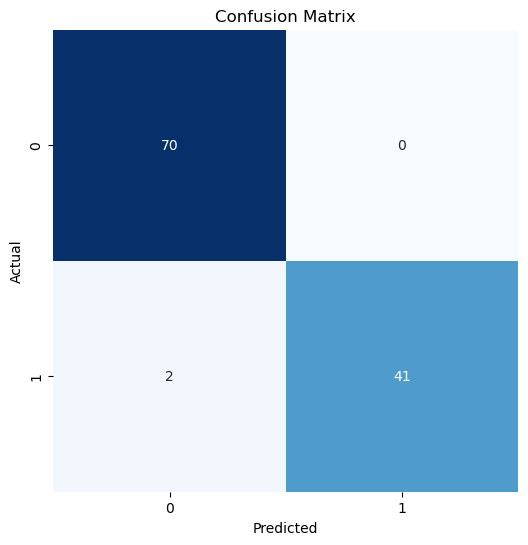

In [5]:
# Plot confusion matrix
plot_confusion_matrix(y_test, predictions)

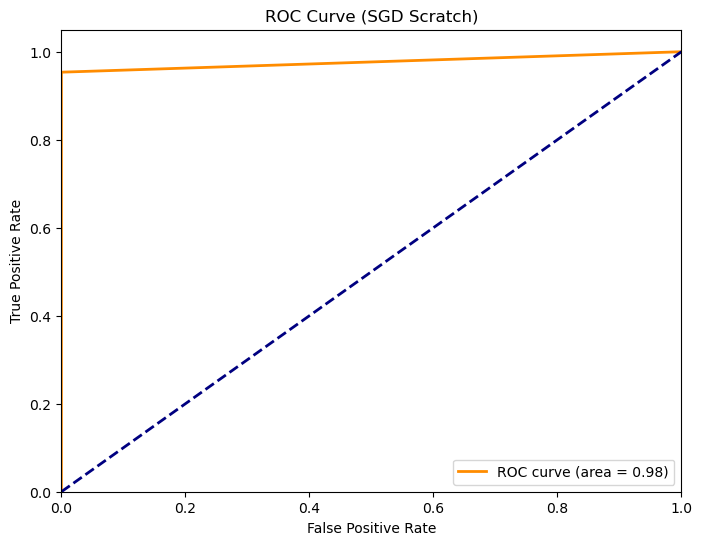

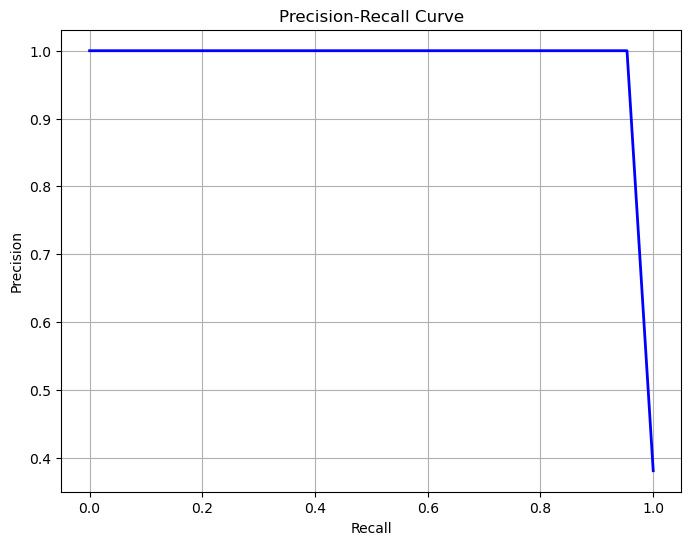

In [6]:
plot_roc_curve(
    y_test,
    predictions,
    title="ROC Curve (SGD Scratch)",
    filename="roc_curve_sgd_scratch.png",
)
plot_precision_recall_curve(y_test, predictions)